In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv("Acessos_Telefonia_Movel_2024_2S.csv", delimiter=";", dtype=str, low_memory=False)

df.head()



,Ano,Mês,Grupo Econômico,Empresa,CNPJ,Porte da Prestadora,UF,Município,Código IBGE Município,Código Nacional,Código Nacional (Chip),Modalidade de Cobrança,Tecnologia,Tecnologia Geração,Tipo de Pessoa,Tipo de Produto,Acessos
0,2024,9,TELECOM AMERICAS,CLARO,40432544000147,Grande Porte,MG,Pequeri,3149507,32,41,Pós-pago,GSM,2G,Pessoa Jurídica,M2M,1
1,2024,9,TELECOM AMERICAS,CLARO,40432544000147,Grande Porte,SC,Içara,4207007,48,12,Pós-pago,GSM,2G,Pessoa Jurídica,M2M,4
2,2024,9,TELECOM AMERICAS,CLARO,40432544000147,Grande Porte,SP,Guarujá,3518701,13,53,Pós-pago,WCDMA,3G,Pessoa Jurídica,M2M,59
3,2024,9,TELECOM AMERICAS,CLARO,40432544000147,Grande Porte,MA,São Luís,2111300,98,81,Pós-pago,GSM,2G,Pessoa Jurídica,M2M,530
4,2024,9,TELECOM AMERICAS,CLARO,40432544000147,Grande Porte,MG,Buritis,3109303,38,21,Pós-pago,WCDMA,3G,Pessoa Jurídica,M2M,1


In [3]:
# Remover pontos como separadores de milhar, substituir vírgulas por pontos e espaços em branco
df['Acessos'] = df['Acessos'].str.replace('.', '', regex=False)  
df['Acessos'] = df['Acessos'].str.replace(',', '.', regex=False)  
df['Acessos'] = df['Acessos'].str.strip() 

# Converter para numérico, transformando valores inválidos em NaN
df['Acessos'] = pd.to_numeric(df['Acessos'], errors='coerce')

# Verificar os tipos de dados após o processamento
print(df.dtypes)

Ano                       object
Mês                       object
Grupo Econômico           object
Empresa                   object
CNPJ                      object
Porte da Prestadora       object
UF                        object
Município                 object
Código IBGE Município     object
Código Nacional           object
Código Nacional (Chip)    object
Modalidade de Cobrança    object
Tecnologia                object
Tecnologia Geração        object
Tipo de Pessoa            object
Tipo de Produto           object
Acessos                    int64
dtype: object


In [4]:
#info do tipo das tabelas
df.info()



#verificar valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304416 entries, 0 to 6304415
Data columns (total 17 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Ano                     object
 1   Mês                     object
 2   Grupo Econômico         object
 3   Empresa                 object
 4   CNPJ                    object
 5   Porte da Prestadora     object
 6   UF                      object
 7   Município               object
 8   Código IBGE Município   object
 9   Código Nacional         object
 10  Código Nacional (Chip)  object
 11  Modalidade de Cobrança  object
 12  Tecnologia              object
 13  Tecnologia Geração      object
 14  Tipo de Pessoa          object
 15  Tipo de Produto         object
 16  Acessos                 int64 
dtypes: int64(1), object(16)
memory usage: 817.7+ MB


Ano                       0
Mês                       0
Grupo Econômico           0
Empresa                   0
CNPJ                      0
Porte da Prestadora       0
UF                        0
Município                 0
Código IBGE Município     0
Código Nacional           0
Código Nacional (Chip)    0
Modalidade de Cobrança    0
Tecnologia                0
Tecnologia Geração        0
Tipo de Pessoa            0
Tipo de Produto           0
Acessos                   0
dtype: int64

In [5]:
#Empresas analisadas
print(df['Empresa'].unique())

print("--------------------------------------------------------------")

#Numero de acessos por empresas
top_prestadoras = df.groupby('Empresa')['Acessos'].sum().sort_values(ascending=False).head(10)

print(top_prestadoras)

['CLARO' 'LIGGA TELECOM' 'VIVO' 'TIM' 'UNIFIQUE' 'DATORA'
 'Next Level Telecom Ltda.' 'ALGAR (CTBC TELECOM)' 'SURF TELECOM'
 'TELEXPERTS TELECOMUNICAÇÕES S.A.' 'VERO' 'BRISANET']
--------------------------------------------------------------
Empresa
VIVO                                304025405
CLARO                               264844314
TIM                                 186453172
ALGAR (CTBC TELECOM)                 12981124
DATORA                                8166916
SURF TELECOM                          4064453
Next Level Telecom Ltda.              2869794
TELEXPERTS TELECOMUNICAÇÕES S.A.      1497860
BRISANET                               572607
VERO                                   561495
Name: Acessos, dtype: int64


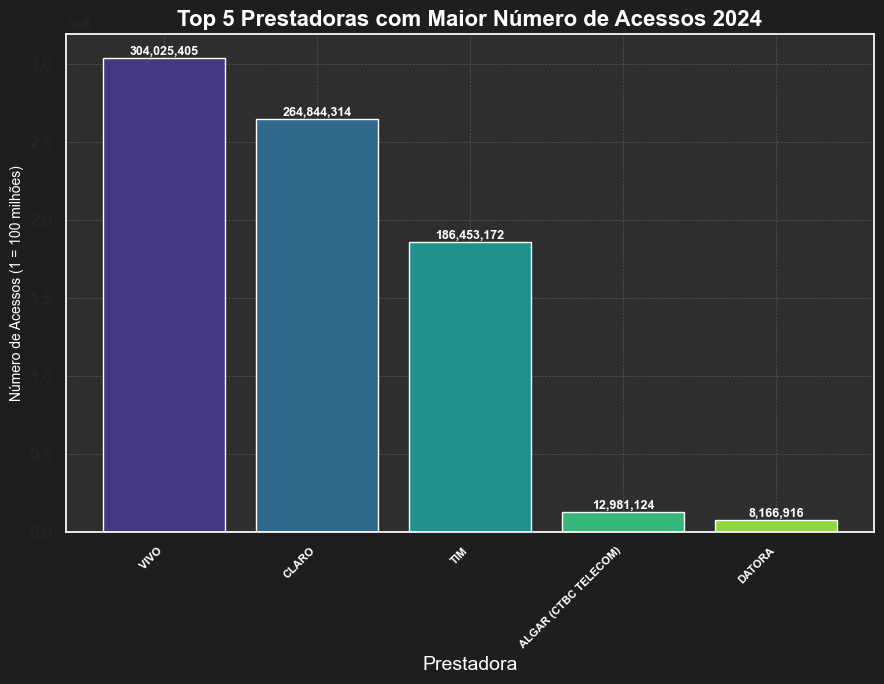

In [31]:


# Filtrando para as 5 maiores prestadoras
top_prestadoras = top_prestadoras.head(5)

# Configuração de estilo do gráfico
sns.set_style("darkgrid")  # Estilo de fundo escuro com grade
plt.figure(figsize=(9, 7))  # Tamanho do gráfico
colors = sns.color_palette("viridis", len(top_prestadoras))  # Paleta de cores

# Criar o gráfico de barras
bars = plt.bar(top_prestadoras.index, top_prestadoras.values, color=colors)

# Adicionar título e rótulos
plt.title('Top 5 Prestadoras com Maior Número de Acessos 2024', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Prestadora', fontsize=14, color='white')
plt.ylabel('Número de Acessos (1 = 100 milhões)', fontsize=10, color='white')
plt.xticks(rotation=45, ha='right', fontsize=8, color='white', fontweight='bold')
plt.yticks(fontsize=12)

# Adicionar valores nas barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{int(bar.get_height()):,}',  # Formatando o número com separador de milhares
             ha='center', va='bottom', fontsize=9, color='white', fontweight='bold')

# Alterar cor de fundo do gráfico
plt.gca().set_facecolor('#2E2E2E')  # Fundo do gráfico em cinza escuro
plt.gcf().set_facecolor('#1E1E1E')  # Fundo da figura em cinza ainda mais escuro
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)  # Grade em cinza claro

# Ajustar margens e mostrar o gráfico
plt.tight_layout()
plt.show()

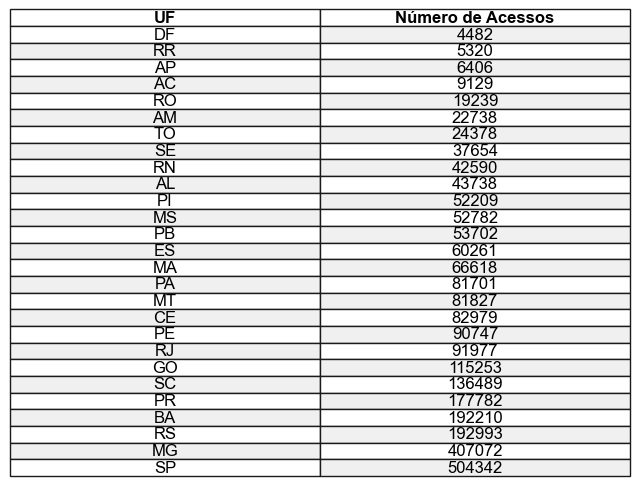

In [32]:
# Filtrando os dados apenas da VIVO
df_vivo = df[df['Empresa'] == "VIVO"]

# Contando os acessos por UF para a VIVO e ordenando do menor para o maior
acessos_vivo_UF = df_vivo['UF'].value_counts().sort_values(ascending=True)

# Configuração do estilo para fundo branco
sns.set(style="whitegrid")  # Estilo de fundo branco com grade

# Criar a figura para a tabela
fig, ax = plt.subplots(figsize=(8, 6))  # Tamanho da imagem
ax.axis("off")  # Esconder os eixos

# Criando a tabela
table = ax.table(
    cellText=acessos_vivo_UF.reset_index().values,  # Dados da tabela
    colLabels=['UF', 'Número de Acessos'],  # Cabeçalhos das colunas
    cellLoc='center', loc='center',  # Localização das células
    colColours=['#ffffff'] * 2  # Cor de fundo dos cabeçalhos em branco
)

# Estilizando as células e texto
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight="bold", color='black')  # Cabeçalhos em negrito e texto preto
        cell.set_facecolor('#ffffff')  # Fundo branco para cabeçalhos
    else:
        cell.set_text_props(color='black')  # Texto preto
        if (i + j) % 2 == 0:
            cell.set_facecolor('#f0f0f0')  # Cores alternadas para células em fundo claro
        else:
            cell.set_facecolor('#ffffff')  # Cores alternadas para células em fundo branco

# Salvando a imagem da tabela
plt.savefig("acessos_vivo_uf.png", bbox_inches="tight", dpi=300)

# Exibir a imagem
plt.show()



    UF Percentual de Acessos da VIVO (%)
7   ES                            74.44%
24  SE                            71.51%
21  RR                            54.61%
12  MT                            53.64%
10  MG                            53.09%
11  MS                            49.28%
22  RS                            48.66%
2   AM                            46.50%
13  PA                            43.45%
3   AP                            43.35%
0   AC                            41.15%
4   BA                            38.58%
25  SP                            36.77%
18  RJ                            34.34%
9   MA                            33.78%
6   DF                            33.18%
5   CE                            33.13%
14  PB                            33.04%
8   GO                            32.96%
23  SC                            31.56%
1   AL                            31.20%
16  PI                            29.25%
15  PE                            29.10%
19  RN          

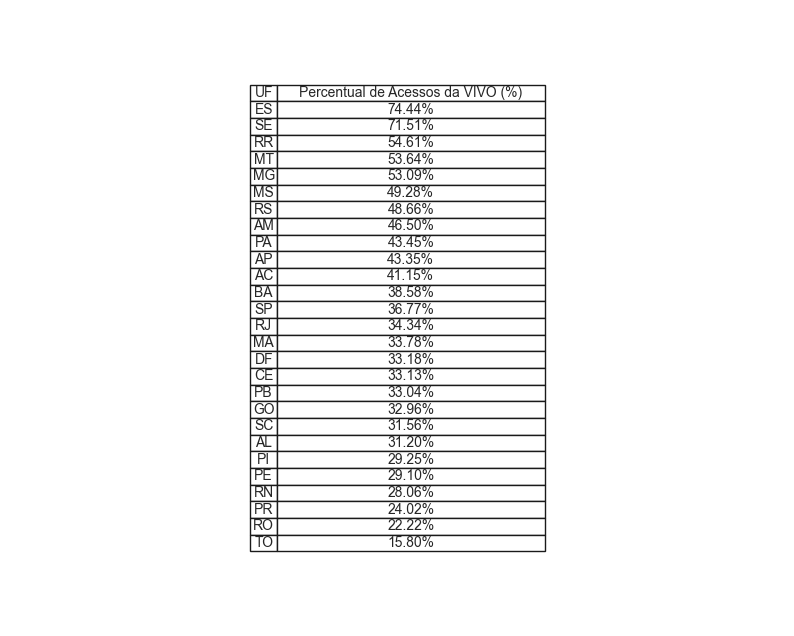

In [ ]:

# Total de acessos por estado
total_acessos_uf = df.groupby('UF')['Acessos'].sum()

# Total de acessos da VIVO por estado
vivo_acessos_uf = df[df['Empresa'] == "VIVO"].groupby('UF')['Acessos'].sum()

# Cria um DataFrame com os percentuais
percentual_acessos_vivo = (vivo_acessos_uf / total_acessos_uf * 100).reset_index()
percentual_acessos_vivo.columns = ['UF', 'Percentual de Acessos da VIVO (%)']

# Preenchendo valores NaN com 0 (caso alguma UF não tenha acessos da VIVO)
percentual_acessos_vivo['Percentual de Acessos da VIVO (%)'] = percentual_acessos_vivo['Percentual de Acessos da VIVO (%)'].fillna(0)

# Formatando os valores com 2 casas decimais e adicionando o símbolo de %
percentual_acessos_vivo['Percentual de Acessos da VIVO (%)'] = percentual_acessos_vivo['Percentual de Acessos da VIVO (%)'].map(lambda x: f"{x:.2f}%")

# Exibindo os dados ordenados
percentual_acessos_vivo = percentual_acessos_vivo.sort_values(by='Percentual de Acessos da VIVO (%)', ascending=False)
print(percentual_acessos_vivo)

# Salvando como imagem usando matplotlib
sns.set(style="white")  # Estilo branco para tabela
fig, ax = plt.subplots(figsize=(10, 8))  # Tamanho da figura
ax.axis('off')  # Esconder eixos

# Criar a tabela como figura
table = ax.table(
    cellText=percentual_acessos_vivo.values,
    colLabels=percentual_acessos_vivo.columns,
    cellLoc='center',
    loc='center'
)

# Estilizar a tabela
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(percentual_acessos_vivo.columns))))

# Salvar a tabela como imagem
plt.savefig("percentual_acessos_vivo_formatado.png", bbox_inches="tight", dpi=300)

# Mostrar a tabela na tela
plt.show()


In [9]:

# Estados com acessos 5G
ufs_com_5g = df_vivo[df_vivo['Tecnologia Geração'] == '5G']['UF'].unique()

# Estados sem acessos 5G
ufs_sem_5g = set(df_vivo['UF'].unique()) - set(ufs_com_5g)

print("Estados onde a VIVO não teve acessos 5G:")
print(sorted(ufs_sem_5g))


Estados onde a VIVO não teve acessos 5G:
[]


In [10]:


# Municípios com acessos 5G
municipios_com_5g = df_vivo[df_vivo['Tecnologia Geração'] == '5G']['Município'].unique()

# Municípios sem acessos 5G
municipios_sem_5g = set(df_vivo['Município'].unique()) - set(municipios_com_5g)

print("Municípios onde a VIVO não teve acessos 5G:")
print(sorted(municipios_sem_5g))


Municípios onde a VIVO não teve acessos 5G:
['Abadia de Goiás', 'Abadia dos Dourados', 'Abadiânia', 'Abaeté', 'Abaiara', 'Abaré', 'Abatiá', 'Abaíra', 'Abdon Batista', 'Abel Figueiredo', 'Abelardo Luz', 'Abre Campo', 'Abreu e Lima', 'Abreulândia', 'Acaiaca', 'Acajutiba', 'Acarape', 'Acaraú', 'Acari', 'Acará', 'Acauã', 'Aceguá', 'Acopiara', 'Acorizal', 'Acrelândia', 'Acreúna', 'Adamantina', 'Adelândia', 'Adolfo', 'Adrianópolis', 'Adustina', 'Afogados da Ingazeira', 'Afonso Bezerra', 'Afonso Cláudio', 'Afonso Cunha', 'Afrânio', 'Afuá', 'Agrestina', 'Agricolândia', 'Agrolândia', 'Agronômica', 'Aguanil', 'Aguaí', 'Agudo', 'Agudos', 'Agudos do Sul', 'Aguiar', 'Aguiarnópolis', 'Aimorés', 'Aiquara', 'Aiuaba', 'Aiuruoca', 'Ajuricaba', 'Alagoa', 'Alagoa Grande', 'Alagoa Nova', 'Alagoinha', 'Alagoinha do Piauí', 'Alagoinhas', 'Alambari', 'Albertina', 'Alcantil', 'Alcinópolis', 'Alcobaça', 'Alcântara', 'Alcântaras', 'Aldeias Altas', 'Alecrim', 'Alegre', 'Alegrete', 'Alegrete do Piauí', 'Alegria', 

   Estado  Quantidade de Municípios Sem infraestrutura para 5G
0      MG                                                799  
1      SP                                                504  
2      RS                                                464  
3      BA                                                402  
4      PR                                                375  
5      SC                                                278  
6      GO                                                230  
7      PI                                                223  
8      PB                                                218  
9      MA                                                215  
10     PE                                                175  
11     CE                                                175  
12     RN                                                164  
13     TO                                                137  
14     MT                                              

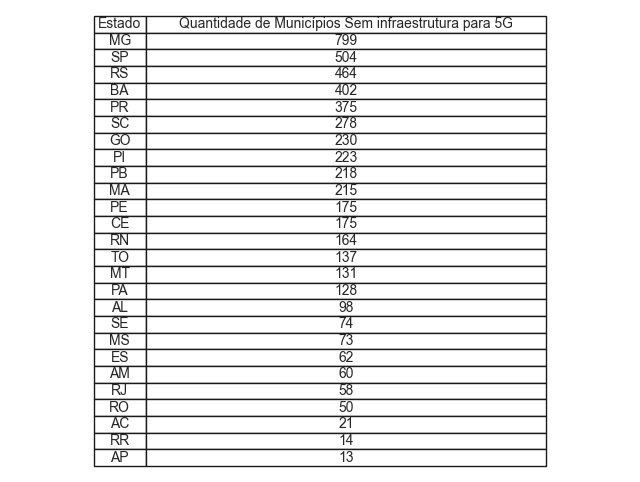

In [11]:


# Municípios com infraestrutura para 5G
municipios_com_5g_uf = df_vivo[df_vivo['Tecnologia Geração'] == '5G'][['UF', 'Município']].drop_duplicates()

# Todos os municípios atendidos pela VIVO (independentemente da tecnologia)
municipios_total = df_vivo[['UF', 'Município']].drop_duplicates()

# Identificar municípios sem 5G
municipios_sem_5g_uf = municipios_total.merge(
    municipios_com_5g_uf,
    on=['UF', 'Município'],
    how='left',
    indicator=True
).query('_merge == "left_only"').drop('_merge', axis=1)

# Contar municípios sem 5G por estado
tabela_sem_5g_por_estado = municipios_sem_5g_uf['UF'].value_counts().reset_index()
tabela_sem_5g_por_estado.columns = ['Estado', 'Quantidade de Municípios Sem infraestrutura para 5G']

# Exibir a tabela
print(tabela_sem_5g_por_estado)

# Salvar a tabela como CSV
tabela_sem_5g_por_estado.to_csv("tabela_sem_5g_por_estado.csv", index=False)



# Configurar estilo da tabela
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')  # Remover eixos

# Criar tabela
table = ax.table(
    cellText=tabela_sem_5g_por_estado.values,
    colLabels=tabela_sem_5g_por_estado.columns,
    cellLoc='center',
    loc='center'
)

# Estilizar tabela
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(tabela_sem_5g_por_estado.columns))))

# Salvar tabela como imagem
plt.savefig("tabela_sem_5g_por_estado.png", bbox_inches="tight", dpi=300)

# Mostrar tabela
plt.show()


   Estado  Total de Municípios  Municípios com 5G  Municípios sem 5G  \
23     AC                   22                  1                 21   
16     AL                  102                  4                 98   
21     AM                   62                  2                 60   
24     AP                   16                  3                 13   
3      BA                  417                 15                402   
11     CE                  184                  9                175   
26     DF                    1                  1                  0   
19     ES                   78                 16                 62   
6      GO                  246                 16                230   
9      MA                  217                  2                215   
0      MG                  853                 54                799   
18     MS                   79                  6                 73   
14     MT                  141                 10               

(None,)

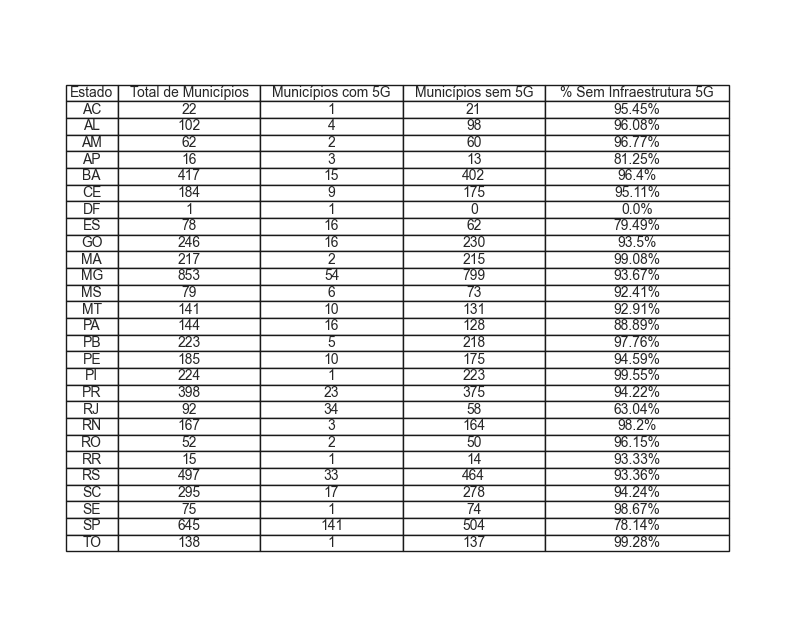

In [12]:


# Total de municípios atendidos pela VIVO por estado
municipios_total_por_estado = df_vivo[['UF', 'Município']].drop_duplicates()['UF'].value_counts().reset_index()
municipios_total_por_estado.columns = ['Estado', 'Total de Municípios']

# Municípios com infraestrutura para 5G por estado
municipios_com_5g = df_vivo[df_vivo['Tecnologia Geração'] == '5G'][['UF', 'Município']].drop_duplicates()
municipios_com_5g_por_estado = municipios_com_5g['UF'].value_counts().reset_index()
municipios_com_5g_por_estado.columns = ['Estado', 'Municípios com 5G']

# Combinar os dados em um único DataFrame
tabela_percentual = municipios_total_por_estado.merge(
    municipios_com_5g_por_estado, on='Estado', how='left'
)

# Preencher valores ausentes com 0 (para estados sem municípios com 5G)
tabela_percentual['Municípios com 5G'] = tabela_percentual['Municípios com 5G'].fillna(0).astype(int)

# Calcular os municípios sem 5G e a porcentagem
tabela_percentual['Municípios sem 5G'] = tabela_percentual['Total de Municípios'] - tabela_percentual['Municípios com 5G']
tabela_percentual['% Sem Infraestrutura 5G'] = (
    (tabela_percentual['Municípios sem 5G'] / tabela_percentual['Total de Municípios']) * 100
).round(2).astype(str) + '%'

# Ordenar pelo estado
tabela_percentual = tabela_percentual.sort_values(by='Estado')

# Exibir a tabela
print(tabela_percentual)

# Salvar como CSV
tabela_percentual.to_csv("percentual_municipios_sem_5g.csv", index=False)


# Configurar estilo da tabela
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')  # Remover eixos

# Criar tabela
table = ax.table(
    cellText=tabela_percentual.values,
    colLabels=tabela_percentual.columns,
    cellLoc='center',
    loc='center'
)

# Estilizar tabela
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(tabela_percentual.columns))))

# Salvar a tabela como imagem
plt.savefig("percentual_municipios_sem_5g.png"),


In [13]:

# Estados com acessos 4G
ufs_com_4g = df_vivo[df_vivo['Tecnologia Geração'] == '4G']['UF'].unique()

# Estados sem acessos 4G
ufs_sem_4g = set(df_vivo['UF'].unique()) - set(ufs_com_5g)

print("Estados onde a VIVO não teve acessos 4G:")
print(sorted(ufs_sem_4g))


Estados onde a VIVO não teve acessos 4G:
[]


In [14]:


# Municípios com acessos 4G
municipios_com_4g = df_vivo[df_vivo['Tecnologia Geração'] == '4G']['Município'].unique()

# Municípios sem acessos 4G
municipios_sem_4g = set(df_vivo['Município'].unique()) - set(municipios_com_4g)

print("Municípios onde a VIVO não teve acessos 4G:")
print(sorted(municipios_sem_4g))


Municípios onde a VIVO não teve acessos 4G:
["Barra D'Alcântara", 'Bom Jesus da Serra']


In [15]:
# Municípios com acessos 4G e 5G
municipios_com_4g = df_vivo[df_vivo['Tecnologia Geração'] == '4G']['Município'].unique()
municipios_com_5g = df_vivo[df_vivo['Tecnologia Geração'] == '5G']['Município'].unique()

# Municípios sem acessos a 4G e 5G
todos_municipios_vivo = set(df_vivo['Município'].unique())
municipios_sem_4g_5g = todos_municipios_vivo - (set(municipios_com_4g) | set(municipios_com_5g))

# Criar DataFrame com os municípios sem 4G e 5G
tabela_sem_4g_5g = pd.DataFrame(sorted(municipios_sem_4g_5g), columns=['Município'])

# Exibir a tabela
print(tabela_sem_4g_5g)

# Opcional: Salvar como arquivo CSV
tabela_sem_4g_5g.to_csv("municipios_sem_4g_5g.csv", index=False)



            Município
0   Barra D'Alcântara
1  Bom Jesus da Serra


In [16]:
# Municípios com acessos 5G
municipios_com_5g = df_vivo[df_vivo['Tecnologia Geração'] == '5G']['Município'].unique()

# Municípios sem acessos 5G
todos_municipios_vivo = set(df_vivo['Município'].unique())
municipios_sem_5g = todos_municipios_vivo - set(municipios_com_5g)

# Criar DataFrame com os municípios sem 5G
tabela_sem_5g = pd.DataFrame(sorted(municipios_sem_5g), columns=['Município'])

# Exibir a tabela
print(tabela_sem_5g)

# Opcional: Salvar como arquivo CSV
tabela_sem_5g.to_csv("municipios_sem_5g.csv", index=False)



                Município
0         Abadia de Goiás
1     Abadia dos Dourados
2               Abadiânia
3                  Abaeté
4                 Abaiara
...                   ...
4863                Áurea
4864               Ângulo
4865        Érico Cardoso
4866               Óbidos
4867                 Óleo

[4868 rows x 1 columns]


In [17]:
#Apenas dados da Claro
df_claro = df[df['Empresa'] == "CLARO"]

print("-------------------------------------------------------------")

print(df_claro['UF'].unique())

print(df_claro["UF"].value_counts())

print("-------------------------------------------------------------")

-------------------------------------------------------------
['MG' 'SC' 'SP' 'MA' 'MS' 'ES' 'RJ' 'RN' 'PE' 'CE' 'PI' 'RS' 'PB' 'GO'
 'BA' 'PR' 'AL' 'TO' 'RO' 'PA' 'MT' 'SE' 'AC' 'RR' 'AP' 'AM' 'DF']
UF
SP    411908
MG    273071
BA    176523
PR    159327
RS    149586
GO    120290
SC    119836
MA     92375
PE     86457
RJ     81372
CE     78410
PA     78212
MT     71120
TO     52020
MS     46864
PI     46550
PB     42565
ES     39740
RN     39169
AL     35544
RO     27709
AM     21934
SE     20711
AC     10634
RR      6801
AP      6757
DF      3829
Name: count, dtype: int64
-------------------------------------------------------------


In [18]:
#Apenas dados da TIM
df_tim = df[df['Empresa'] == "TIM"]

print("-------------------------------------------------------------")

print(df_tim['UF'].unique())

print(df_tim["UF"].value_counts())

print("-------------------------------------------------------------")

-------------------------------------------------------------
['SP' 'BA' 'CE' 'PE' 'GO' 'RJ' 'PR' 'MG' 'RN' 'SC' 'PI' 'AL' 'MS' 'RO'
 'RS' 'AM' 'MT' 'SE' 'PA' 'PB' 'ES' 'TO' 'RR' 'MA' 'AP' 'AC' 'DF']
UF
SP    222937
MG    156777
PR    124215
BA     91844
SC     89078
RS     78256
PE     55353
GO     52479
CE     51941
RJ     48477
MA     40074
PB     38919
PA     35310
RN     31532
MT     29605
PI     25616
AL     23682
MS     23487
ES     20125
TO     12667
SE     12339
RO      9660
AM      7923
AC      3338
RR      2710
AP      2618
DF      2278
Name: count, dtype: int64
-------------------------------------------------------------


In [19]:

# Total por Tecnologia Geração
acessos_por_tecnologia_gen = df.groupby('Tecnologia Geração')['Acessos'].sum()
print(acessos_por_tecnologia_gen)

print("-------------------------------------------------")

#Total por Tecnologia 
acessos_por_tecnologia = df.groupby('Tecnologia')['Acessos'].sum()
print(acessos_por_tecnologia)

Tecnologia Geração
2G     59978798
3G     55585136
4G    571671158
5G     99046280
Name: Acessos, dtype: int64
-------------------------------------------------
Tecnologia
CDMA IS 95          281
GSM            59978517
LTE           571671158
NR             99046280
WCDMA          55585136
Name: Acessos, dtype: int64


In [20]:
# Total por tecnologia VIVO
acessos_por_tecnologia_vivo = df_vivo.groupby('Tecnologia')['Acessos'].sum()
print(acessos_por_tecnologia_vivo)

print("--------------------------------------------")

acessos_por_tecnologia_gen_vivo = df_vivo.groupby('Tecnologia Geração')['Acessos'].sum()
print(acessos_por_tecnologia_gen_vivo)




Tecnologia
CDMA IS 95          281
GSM            35380347
LTE           213260239
NR             38749504
WCDMA          16635034
Name: Acessos, dtype: int64
--------------------------------------------
Tecnologia Geração
2G     35380628
3G     16635034
4G    213260239
5G     38749504
Name: Acessos, dtype: int64


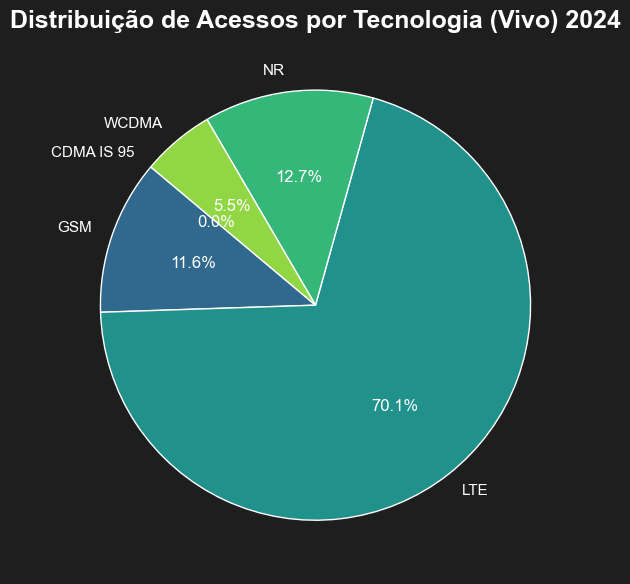

In [21]:
# Estilo
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")


# Paleta de cores
colors = sns.color_palette("viridis", len(acessos_por_tecnologia_vivo))

# Criar o gráfico de pizza
plt.pie(
    acessos_por_tecnologia_vivo, 
    labels=acessos_por_tecnologia_vivo.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    textprops={'color': 'white'}, 

)

# Título
plt.title('Distribuição de Acessos por Tecnologia (Vivo) 2024', fontsize=18, fontweight='bold', color='white')

# Alterar cor de fundo
plt.gca().set_facecolor('#1E1E1E')
plt.gcf().set_facecolor('#1E1E1E')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

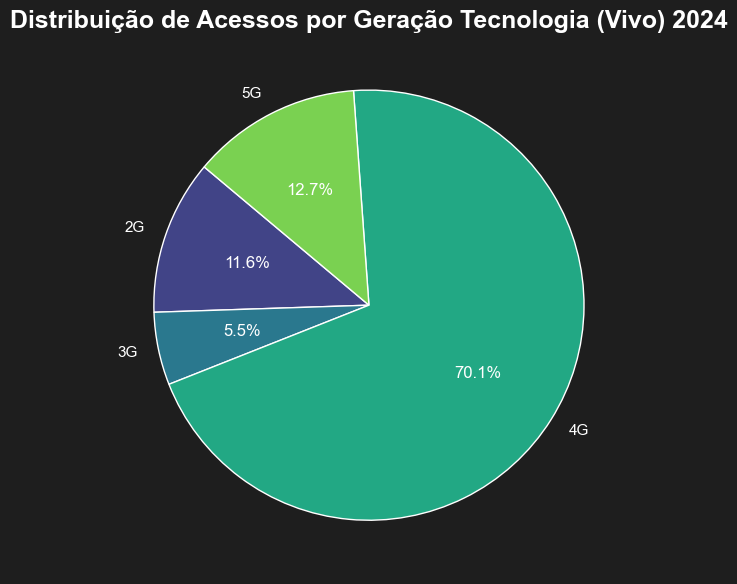

In [22]:
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")  # Estilo escuro

# Criar o gráfico de pizza
colors = sns.color_palette("viridis", len(acessos_por_tecnologia_gen_vivo))  # Paleta de cores
plt.pie(
    acessos_por_tecnologia_gen_vivo, 
    labels=acessos_por_tecnologia_gen_vivo.index, 
    autopct='%1.1f%%',  # Mostra as porcentagens
    startangle=140,  # Ajusta o ângulo inicial
    colors=colors, 
    textprops={'color': 'white'}  # Torna os textos legíveis em tema escuro
)

# Título
plt.title('Distribuição de Acessos por Geração Tecnologia (Vivo) 2024', fontsize=18, fontweight='bold', color='white')

# Alterar cor de fundo
plt.gca().set_facecolor('#1E1E1E')  # Fundo escuro do gráfico
plt.gcf().set_facecolor('#1E1E1E')  # Fundo escuro da figura

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [23]:
# Total por tecnologia Claro
acessos_por_tecnologia_claro = df_claro.groupby('Tecnologia')['Acessos'].sum()
print(acessos_por_tecnologia_claro)

print("--------------------------------------------")

acessos_por_tecnologia_gen_claro = df_claro.groupby('Tecnologia Geração')['Acessos'].sum()
print(acessos_por_tecnologia_gen_claro)

Tecnologia
GSM       10918270
LTE      184990908
NR        35345967
WCDMA     33589169
Name: Acessos, dtype: int64
--------------------------------------------
Tecnologia Geração
2G     10918270
3G     33589169
4G    184990908
5G     35345967
Name: Acessos, dtype: int64


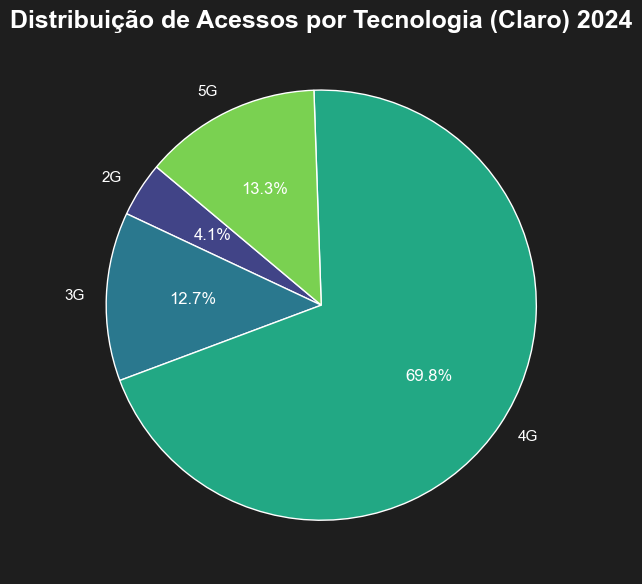

In [24]:
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")  # Estilo escuro

# Criar o gráfico de pizza
colors = sns.color_palette("viridis", len(acessos_por_tecnologia_gen_claro))  # Paleta de cores
plt.pie(
    acessos_por_tecnologia_gen_claro, 
    labels=acessos_por_tecnologia_gen_claro.index, 
    autopct='%1.1f%%',  # Mostra as porcentagens
    startangle=140,  # Ajusta o ângulo inicial
    colors=colors, 
    textprops={'color': 'white'}  # Torna os textos legíveis em tema escuro
)

# Título
plt.title('Distribuição de Acessos por Tecnologia (Claro) 2024', fontsize=18, fontweight='bold', color='white')

# Alterar cor de fundo
plt.gca().set_facecolor('#1E1E1E')  # Fundo escuro do gráfico
plt.gcf().set_facecolor('#1E1E1E')  # Fundo escuro da figura

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [25]:
# Total por tecnologia TIM
acessos_por_tecnologia_tim = df_tim.groupby('Tecnologia')['Acessos'].sum()
print(acessos_por_tecnologia_tim)

print("--------------------------------------------")

acessos_por_tecnologia_gen_tim = df_tim.groupby('Tecnologia Geração')['Acessos'].sum()
print(acessos_por_tecnologia_gen_tim)

Tecnologia
GSM        5533634
LTE      153356338
NR        24780983
WCDMA      2782217
Name: Acessos, dtype: int64
--------------------------------------------
Tecnologia Geração
2G      5533634
3G      2782217
4G    153356338
5G     24780983
Name: Acessos, dtype: int64


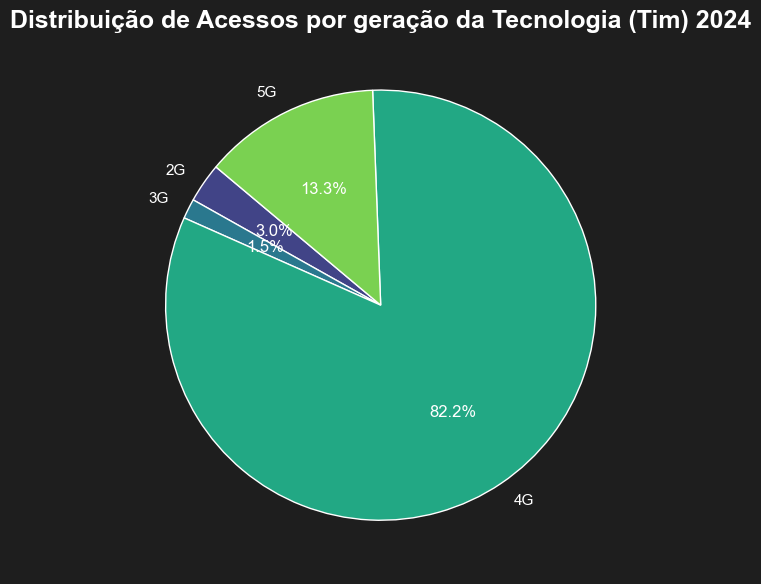

In [26]:


plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")  # Estilo escuro

# Criar o gráfico de pizza
colors = sns.color_palette("viridis", len(acessos_por_tecnologia_gen_tim))  # Paleta de cores
plt.pie(
    acessos_por_tecnologia_gen_tim, 
    labels=acessos_por_tecnologia_gen_tim.index, 
    autopct='%1.1f%%',  # Mostra as porcentagens
    startangle=140,  # Ajusta o ângulo inicial
    colors=colors, 
    textprops={'color': 'white'}  # Torna os textos legíveis em tema escuro
)

# Título
plt.title('Distribuição de Acessos por geração da Tecnologia (Tim) 2024', fontsize=18, fontweight='bold', color='white')

# Alterar cor de fundo
plt.gca().set_facecolor('#1E1E1E')  # Fundo escuro do gráfico
plt.gcf().set_facecolor('#1E1E1E')  # Fundo escuro da figura

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [27]:
# Verificar qual Modalidade de Cobrança é mais usada
modalidade_cobranca = df["Modalidade de Cobrança"].value_counts()


# Verificar qual Tipo de Pessoa é mais frequente
tipo_pessoa = df["Tipo de Pessoa"].value_counts()

# Exibir os resultados
print(f"Modalidade de Cobrança mais usada: {modalidade_cobranca}")

print("---------------------------------------------")

print(f"Tipo de Pessoa mais frequente: {tipo_pessoa}")


Modalidade de Cobrança mais usada: Modalidade de Cobrança
Pós-pago    4144504
Pré-pago    2159912
Name: count, dtype: int64
---------------------------------------------
Tipo de Pessoa mais frequente: Tipo de Pessoa
Pessoa Física      3829424
Pessoa Jurídica    2474992
Name: count, dtype: int64


In [28]:
# Agrupar por Tipo de Pessoa e calcular a Modalidade de Cobrança mais usada e sua frequência
modalidade_por_pessoa = (
    df.groupby("Tipo de Pessoa")["Modalidade de Cobrança"]
    .apply(lambda x: x.value_counts().head(1))
    .reset_index()
)

# Renomear as colunas para melhor compreensão
modalidade_por_pessoa.columns = ["Tipo de Pessoa", "Modalidade de Cobrança mais usada", "Frequência"]

# Exibir o resultado
print(modalidade_por_pessoa)



    Tipo de Pessoa Modalidade de Cobrança mais usada  Frequência
0    Pessoa Física                          Pré-pago     2153482
1  Pessoa Jurídica                          Pós-pago     2468562


In [29]:
# Lista de empresas a serem excluídas
empresas_excluidas = ["VIVO", "TIM", "CLARO"]

# Filtrar o DataFrame para excluir essas empresas
df_filtrado = df[~df["Empresa"].isin(empresas_excluidas)]

# 1. Encontrar a maior empresa por UF
acessos_por_uf = df_filtrado.groupby(["UF", "Empresa"])["Acessos"].sum().reset_index()
maior_empresa_por_uf = (
    acessos_por_uf.sort_values("Acessos", ascending=False)
    .groupby("UF")
    .first()
    .reset_index()
)

# 2. Encontrar a tecnologia e geração mais usadas por UF
tecnologia_geracao = (
    df_filtrado.groupby(["UF", "Tecnologia", "Tecnologia Geração"])["Acessos"]
    .sum()
    .reset_index()
    .sort_values("Acessos", ascending=False)
    .groupby("UF")
    .first()
    .reset_index()
)

# 3. Combinar os resultados
resultado = maior_empresa_por_uf.merge(
    tecnologia_geracao,
    on="UF",
    how="left",
    suffixes=("_Empresa", "_Tecnologia")
)

# Renomear as colunas para facilitar a leitura
resultado.columns = [
    "UF",
    "Empresa com mais acessos",
    "Acessos Empresa",
    "Tecnologia mais usada",
    "Geração de Tecnologia mais usada",
    "Acessos Tecnologia"
]

# Exibir o DataFrame final
resultado.head(30)


,UF,Empresa com mais acessos,Acessos Empresa,Tecnologia mais usada,Geração de Tecnologia mais usada,Acessos Tecnologia
0,AC,DATORA,39468,GSM,2G,39423
1,AL,DATORA,33240,GSM,2G,29373
2,AM,SURF TELECOM,15215,LTE,4G,17074
3,AP,SURF TELECOM,8924,LTE,4G,9822
4,BA,Next Level Telecom Ltda.,846017,LTE,4G,939937
5,CE,BRISANET,525655,LTE,4G,571855
6,DF,DATORA,186183,GSM,2G,185160
7,ES,SURF TELECOM,31522,LTE,4G,65800
8,GO,ALGAR (CTBC TELECOM),129183,GSM,2G,123439
9,MA,Next Level Telecom Ltda.,165866,LTE,4G,192593


Imagem salva como: resultado.png


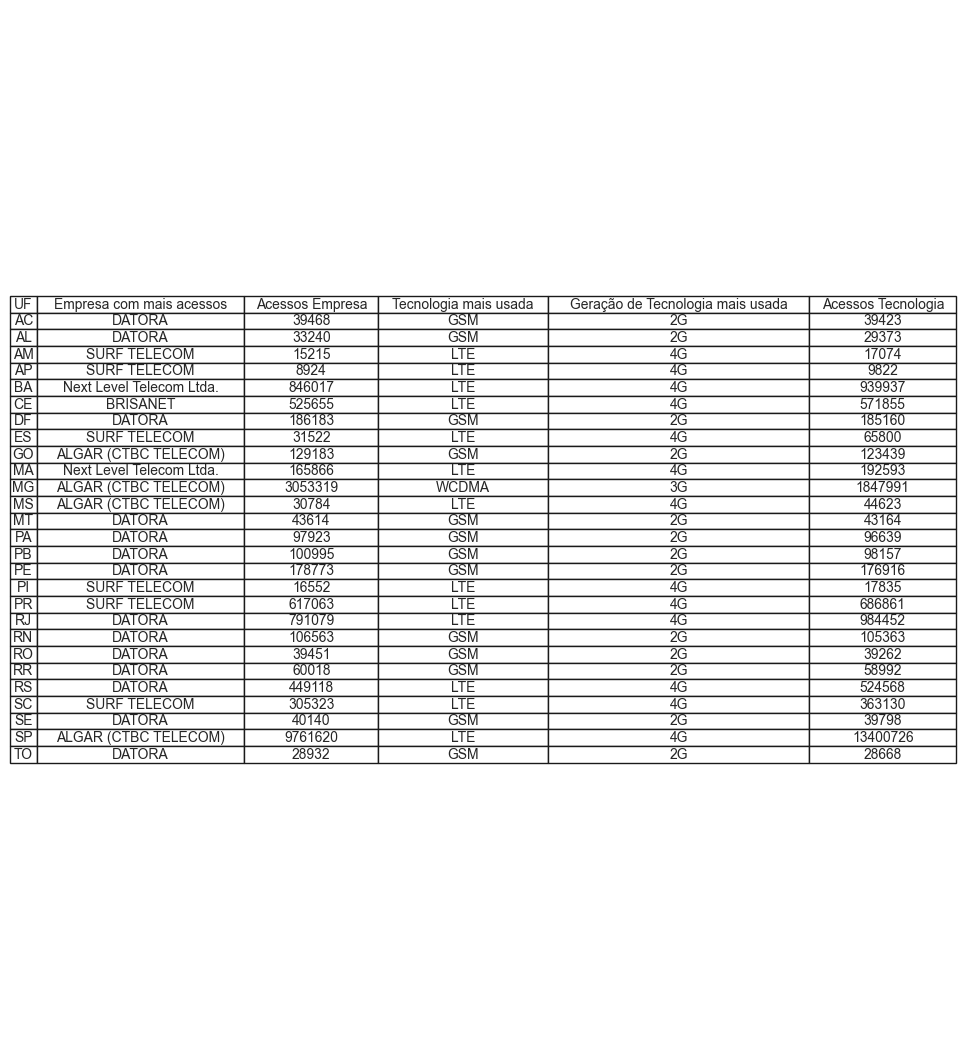

In [30]:

# Função para salvar DataFrame como imagem
def dataframe_to_image(df, filename):
    # Configurar tamanho da figura com base no número de linhas do DataFrame
    fig, ax = plt.subplots(figsize=(10, len(df) * 0.5))
    ax.axis("tight")
    ax.axis("off")

    # Criar tabela a partir do DataFrame
    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center",
        loc="center",
    )

    # Ajustar fonte e tamanho da tabela
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df.columns))))

    # Salvar a tabela como imagem
    plt.savefig(filename, bbox_inches="tight", dpi=300)
    print(f"Imagem salva como: {filename}")

# Salvar o DataFrame 'resultado' como imagem
dataframe_to_image(resultado, "resultado.png")
